### Task 5.1
* Name:LI WAN
* Student Number:223718804
* E-mail:s223718804@deakin.edu.au
* Course:SIT720
---

In [54]:
# Q1  Load the dataset from “data.csv”.  Create training and test datasets using random splitting (80-20)%. Print the  number of samples in train and test data groupby "roof_type".
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
local_path = r'E:\2-学习\1-Deakin\24-T1\SIT720\Task\data_5.csv'
df=pd.read_csv(local_path, comment='#')
df

,structure_max_elevation,footprint_max_elevation,structure_min_elevation,property_id,footprint_extrusion,footprint_min_elevation,structure_extrusion,roof_type
0,30.5,30.5,17.5,109953,13.5,17.5,13.0,Flat
1,32.5,26.5,18.0,105685,9.0,18.0,8.5,Flat
2,32.5,32.5,18.0,105685,5.5,26.5,14.5,Hip
3,20.5,19.5,17.0,104550,2.0,17.0,2.5,Flat
4,24.5,23.5,17.0,104870,6.0,17.0,6.5,Flat
...,...,...,...,...,...,...,...,...
2995,54.0,49.5,39.5,100560,10.5,39.5,10.0,Flat
2996,53.0,45.0,39.5,557293,6.0,39.5,5.5,Flat
2997,53.0,51.0,39.0,557294,12.0,39.0,12.0,Flat
2998,53.0,44.0,40.5,111436,3.5,40.5,3.5,Flat


In [55]:
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# df.iloc[:, -1] is the default test column

# Print the number of samples in train and test data grouped by "roof_type"
print("Train data:")
print(y_train.value_counts())
print("\nTest data:")
print(y_test.value_counts())

Train data:
roof_type
Flat       1673
Gable       415
Hip         298
Pyramid      10
Shed          4
Name: count, dtype: int64

Test data:
roof_type
Flat       400
Gable      115
Hip         83
Pyramid      2
Name: count, dtype: int64


In [56]:
#Q2  Create training and test dataset using leave 5 "property_id" out for testing and rest of them for training. Print the train and test dataset for the first iteration only. Compare with Q-1 in terms of the number of training and testing samples using bar graph.
# Get the unique property_id values
unique_prop_ids = df['property_id'].unique()

# Create the training and test datasets using the "leave-5" method
X_train_leave5 = df[~df['property_id'].isin(test_prop_ids)]
X_test_leave5 = df[df['property_id'].isin(test_prop_ids)]
# Print the number of samples in train and test data grouped by "roof_type"
X_train_leave5_grouped = X_train_leave5 .groupby("roof_type").size()
X_test_leave5_grouped = X_test_leave5.groupby("roof_type").size()

print("Number of samples in train data groupby 'roof_type':")
print(X_train_leave5_grouped)

print("\nNumber of samples in test data groupby 'roof_type':")
print(X_test_leave5_grouped)


Number of samples in train data groupby 'roof_type':
roof_type
Flat       2068
Gable       530
Hip         381
Pyramid      12
Shed          4
dtype: int64

Number of samples in test data groupby 'roof_type':
roof_type
Flat    5
dtype: int64


Total samples: 3000
train_test_split method - Training sample proportion: 80.00%
leave-5 method - Training sample proportion: 99.83%


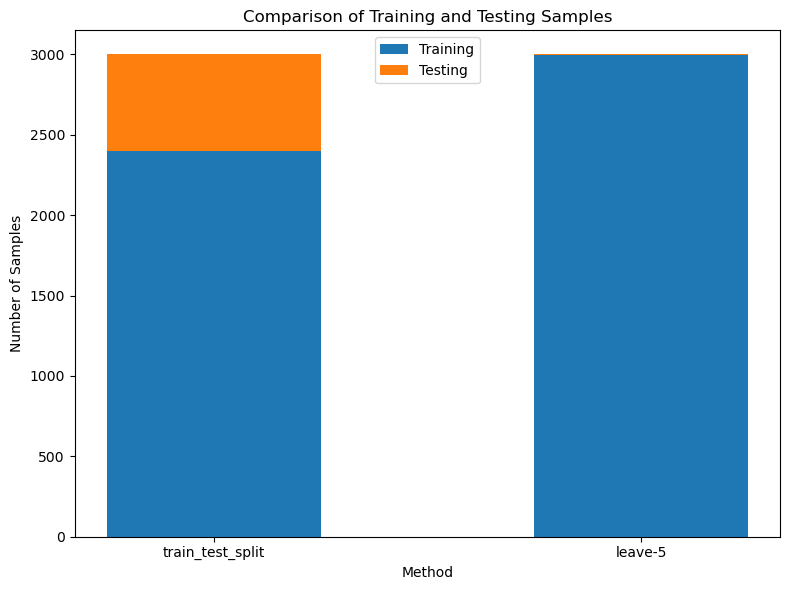

In [65]:
# Calculate the proportion of training data
total_samples = len(X)

train_samples = [len(X_train), len(X_train_leave5)]

train_proportion = [train / total_samples for train in train_samples]

print("Total samples:",total_samples)


for i, method in enumerate(methods):
    print(f"{method} method - Training sample proportion: {train_proportion[i]*100:.2f}%")

# Create the bar graph
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.5

# Plot the train and test data for the two methods
methods = ['train_test_split', 'leave-5']
train_samples = [len(X_train),len(X_train_leave5)]
test_samples = [len(X_test),len(X_test_leave5)]

ax.bar([0, 1], train_samples, label='Training',width=bar_width)
ax.bar([0, 1], test_samples, bottom=train_samples, label='Testing',width=bar_width)

ax.set_xticks([0, 1])
ax.set_xticklabels(methods)
ax.set_title('Comparison of Training and Testing Samples')
ax.set_xlabel('Method')
ax.set_ylabel('Number of Samples')
ax.legend()
# Move the legend to the top
ax.legend(loc='upper center')

plt.tight_layout()
plt.show()

From the graph, we can see the first spliting method, the training sample proportion is 80%. Second splitting method, we only choose 5 data as test, therefore the proportion is 5/3000 which is 99.8%. 
The choice of data split method in machine learning depends on several factors:

Dataset Size: If we have a large dataset, we might opt for simple random sampling because it's computationally efficient. However, if the dataset is small, techniques like cross-validation can help in maximizing the use of available data.

Data Distribution: If our dataset has a class imbalance, we might need to use stratified sampling to ensure that each class is adequately represented in both the training and test sets.

Model Evaluation: The split method can influence model evaluation. For example, using k-fold cross-validation can provide a more robust estimate of model performance compared to a single train-test split, especially if the dataset is small.

Data Temporality: For time-series data, we typically split the data in a chronological order to simulate real-world scenarios where the model is trained on past data and tested on future data.

Bias-Variance Tradeoff: The choice of split method can impact the tradeoff between bias and variance in model evaluation. For instance, a single train-test split might lead to high variance in model evaluation due to the randomness in the split, while techniques like cross-validation can help in reducing this variance.

Computational Resources: Some split methods, such as leave-one-out cross-validation, can be computationally expensive, especially for large datasets. In such cases, simpler split methods like k-fold cross-validation or train-test split might be preferred.

In summary, the choice of data split method depends on various factors including dataset size, data distribution, model evaluation requirements, data temporality, bias-variance tradeoff considerations, and computational resources available.